# Exercise 7 : MazeRunner

---

This notebook covers basic search algorithms for **Path-Finding in a Maze**.       

You will see *uninformed search* algorithms like `breadth_first_search`, `depth_first_search` and `uniform_cost_search`, as well as *informed search* algorithms like `greedy_search` and `astar_search` in action. The setup is a maze with the problem of finding an escape path from the *start* position to the *goal* position on a two-dimensional grid. You will learn how to map a maze (two-dimensional grid) to a graph, and then apply the search algorithms on the graph to solve the problem. Some of the code is provided, while you will have to fill in some on your own. Give it a shot, and have fun!        

**Interactive playground and visualization** for the algorithms are available at this website : https://qiao.github.io/PathFinding.js/visual/

### Exercise Problem

- **Required** : Fill in the missing pieces of code in this Notebook (tagged *MISSING*), and submit the completed Notebook as your solution.       
- **Optional** : Try to attempt the *Experiment and Explore* section at the end of the Notebook, and submit the solutions within this Notebook.       
- **Just for Fun!** : Create a maze based on `KalosMap.jpg` (attached), set *start* and *goal* positions, and try out the path-finding algorithms.    

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library to work with the 2D maze/grid in Python  
> Matplotlib : Primarily for visualization of the 2D maze/grid  
> Seaborn : Mainly for easy maze visualization as heatmap      
> NetworkX : Mainly to visualize the graph representations        
> Queue : Library to work with FIFO, LIFO, Priority queues

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import networkx as nx
import queue

### Helper functions for the Maze

These are just a few helper functions for you to work with the maze/grid easily, and to visualize them in a nice way. **No need to edit in general.**

In [4]:
# Helper functions to work with the Maze

def printBinaryMaze(mazeGrid):
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Simple print of the corresponding maze
    '''
    (height, width) = mazeGrid.shape
    
    print()
    for i in range(height):
        for j in range(width):
            if mazeGrid[i,j] == 1:
                print("\u25a9", end = " ")   # use some other character if the unicode does not print properly
            elif mazeGrid[i,j] == 0:
                print(".", end = " ")
        print()
        

def showBinaryMaze(mazeGrid):
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Heatmap grid of the corresponding maze
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)
    
    
def showBinaryMazeProblem(mazeGrid, start, goal):
    ''' Display the maze corresponding to a binary grid
        Display "start" and "goal" position on the grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinate of the "start" and "goal"
        Output : Heatmap grid of the maze with markers
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255
    
    mazeGrid[start[0], start[1]] = 128
    mazeGrid[goal[0], goal[1]] = 128
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)

---
## Create the Maze as a 2D Grid

Let us create the maze as a standard two-dimensional grid, with reachable (blank) and unreachable (blocked) positions.

In [5]:
# Create the Maze
# 0 : empty cell, reachable within a path
# 1 : blocked cell or wall, not reachable

maze = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# Convert to a NumPy array
maze = np.array(maze)

# Print the maze using helper functions
print("Maze of dimensions", maze.shape)
printBinaryMaze(maze)

Maze of dimensions (10, 20)

▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ 
▩ . . . ▩ . . . . . . . . . . . . . . ▩ 
▩ . ▩ . ▩ . . . . ▩ . ▩ . ▩ ▩ ▩ ▩ ▩ . ▩ 
▩ . ▩ . ▩ . ▩ ▩ . ▩ . ▩ . . ▩ . . . . ▩ 
▩ . ▩ . . . . ▩ . ▩ . . . . ▩ ▩ ▩ ▩ ▩ ▩ 
▩ . ▩ ▩ ▩ ▩ . ▩ . ▩ . ▩ ▩ . ▩ . . . . . 
▩ . . . . . . ▩ . ▩ . . ▩ . ▩ . ▩ ▩ ▩ ▩ 
▩ . ▩ ▩ ▩ ▩ ▩ ▩ . ▩ ▩ . ▩ ▩ ▩ . . . . ▩ 
▩ . . . . . . . . . ▩ . . . . . . . . ▩ 
▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ ▩ 


Display the maze as a Seaborn grayscale heatmap to clearly visualize the pattern and identify the underlying coordinates.

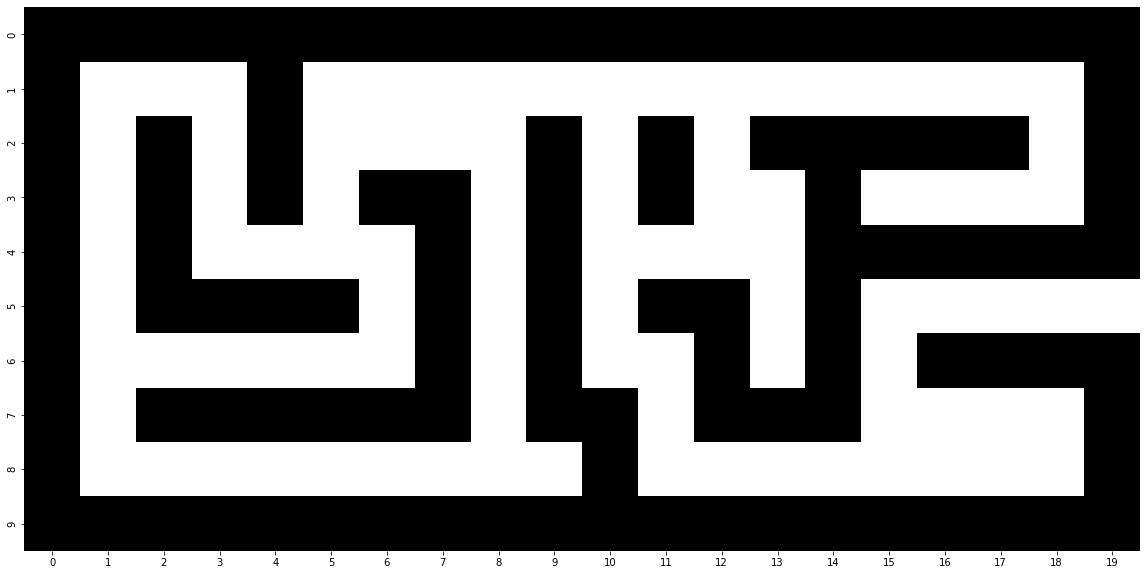

In [6]:
# Show the maze using helper functions
showBinaryMaze(maze)

---
## Path-finding Problem in the Maze

Define the path-finding problem on the maze created above by assigning the *START* and *GOAL* positions as coordinates.

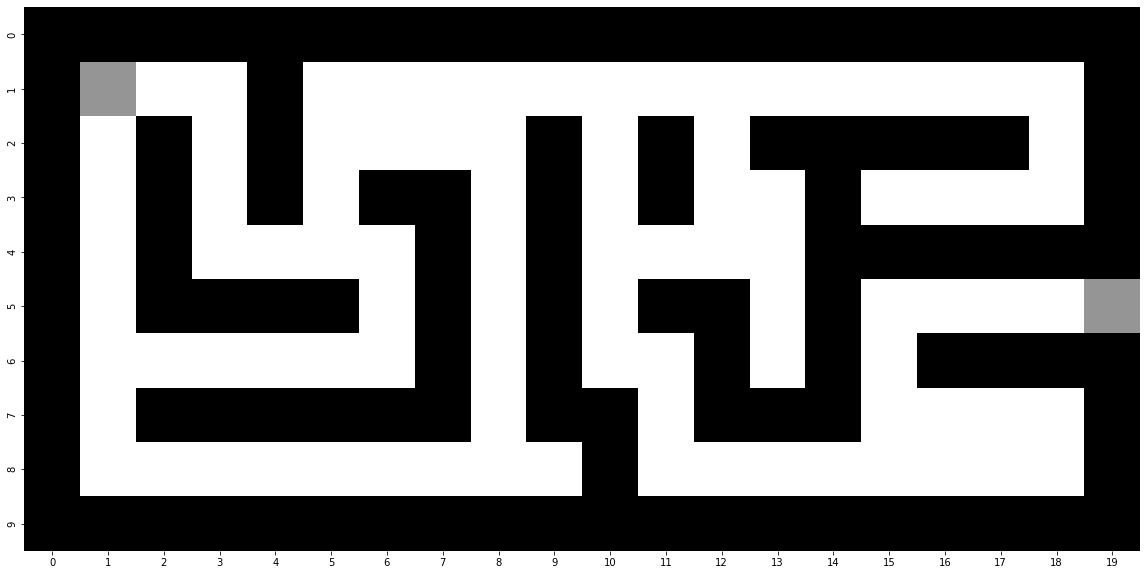

In [7]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Show the maze using helper functions
showBinaryMazeProblem(maze, START, GOAL)

---
## Extract Graph from the Maze

In order to solve the path-finding problem, we will first extract the *traversal graph* corresponding to the maze. To start with, let's define `MazeGraph`.

In [8]:
# Create a Graph class
class MazeGraph(object):
    ''' Class to represent a Graph
        Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {}
    
    def all_edges(self):
        return self.edges
    
    def neighbors(self, node):
        return self.edges[node]    

### Converting a Maze to a Graph

- The nodes/vertices in the graph are all the blank positions/cells in the maze     
- The blocked positions/cells in the maze are not considered as nodes/vertices
- Each node/vertex is connected to its adjacent blank positions/cells in the maze    
- Each node/vertex is assumed to have 4 adjacent nodes: Top, Left, Bottom, Right     
- Default weight for each such edge in the graph between two adjacent vertices is 1     
- We are assuming that diagonal traversal from one cell to another is not permitted    

In [9]:
# Function to convert a maze to a graph
def maze_to_graph(mazeGrid):
    ''' Converts a 2D binary maze to corresponding graph
        Input : 2D NumPy array with 0 and 1 as elements
        Output : MazeGraph corresponding to input maze
    '''
    mazeGraph = MazeGraph()
    (height, width) = mazeGrid.shape
    
    for i in range(height):
        for j in range(width):
            
            # Only consider blank cells as nodes
            if mazeGrid[i,j] == 0:
                
                neighbors = []
                
                # Adjacent cell : Top
                if (i > 0) and mazeGrid[i-1,j] == 0:
                    neighbors.append(((i-1,j), 1))
                    
                # Adjacent cell : Left                
                if (j > 0) and mazeGrid[i,j-1] == 0:
                    neighbors.append(((i,j-1), 1))
                    
                # Adjacent cell : Bottom                    
                if (i < height - 1) and mazeGrid[i+1,j] == 0:
                    neighbors.append(((i+1,j), 1))

                # Adjacent cell : Right                    
                if (j < width - 1) and mazeGrid[i,j+1] == 0:
                    neighbors.append(((i,j+1), 1))

                # Insert edges in the graph
                if len(neighbors) > 0:
                    mazeGraph.edges[(i,j)] = neighbors

    return mazeGraph

In [10]:
# Convert the maze to a graph
mazegraph = maze_to_graph(maze)

# Print the edges with weights
mazegraph.all_edges()

{(1, 1): [((2, 1), 1), ((1, 2), 1)],
 (1, 2): [((1, 1), 1), ((1, 3), 1)],
 (1, 3): [((1, 2), 1), ((2, 3), 1)],
 (1, 5): [((2, 5), 1), ((1, 6), 1)],
 (1, 6): [((1, 5), 1), ((2, 6), 1), ((1, 7), 1)],
 (1, 7): [((1, 6), 1), ((2, 7), 1), ((1, 8), 1)],
 (1, 8): [((1, 7), 1), ((2, 8), 1), ((1, 9), 1)],
 (1, 9): [((1, 8), 1), ((1, 10), 1)],
 (1, 10): [((1, 9), 1), ((2, 10), 1), ((1, 11), 1)],
 (1, 11): [((1, 10), 1), ((1, 12), 1)],
 (1, 12): [((1, 11), 1), ((2, 12), 1), ((1, 13), 1)],
 (1, 13): [((1, 12), 1), ((1, 14), 1)],
 (1, 14): [((1, 13), 1), ((1, 15), 1)],
 (1, 15): [((1, 14), 1), ((1, 16), 1)],
 (1, 16): [((1, 15), 1), ((1, 17), 1)],
 (1, 17): [((1, 16), 1), ((1, 18), 1)],
 (1, 18): [((1, 17), 1), ((2, 18), 1)],
 (2, 1): [((1, 1), 1), ((3, 1), 1)],
 (2, 3): [((1, 3), 1), ((3, 3), 1)],
 (2, 5): [((1, 5), 1), ((3, 5), 1), ((2, 6), 1)],
 (2, 6): [((1, 6), 1), ((2, 5), 1), ((2, 7), 1)],
 (2, 7): [((1, 7), 1), ((2, 6), 1), ((2, 8), 1)],
 (2, 8): [((1, 8), 1), ((2, 7), 1), ((3, 8), 1)],
 (2

### Displaying the Maze Graph

**This is optional.** Just a helper function to display the graph using NetworkX. You may examine the graph node-by-node is you wish.

In [11]:
# Helper functions to display a Graph

def showBinaryMazeGraph(mazeGraph):
    ''' Display a graph using networkx
        Input : MazeGraph from 2D maze
        Output : Input graph displayed
    '''
    edgeDict = mazeGraph.all_edges()
    edgeList = []
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 2)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()

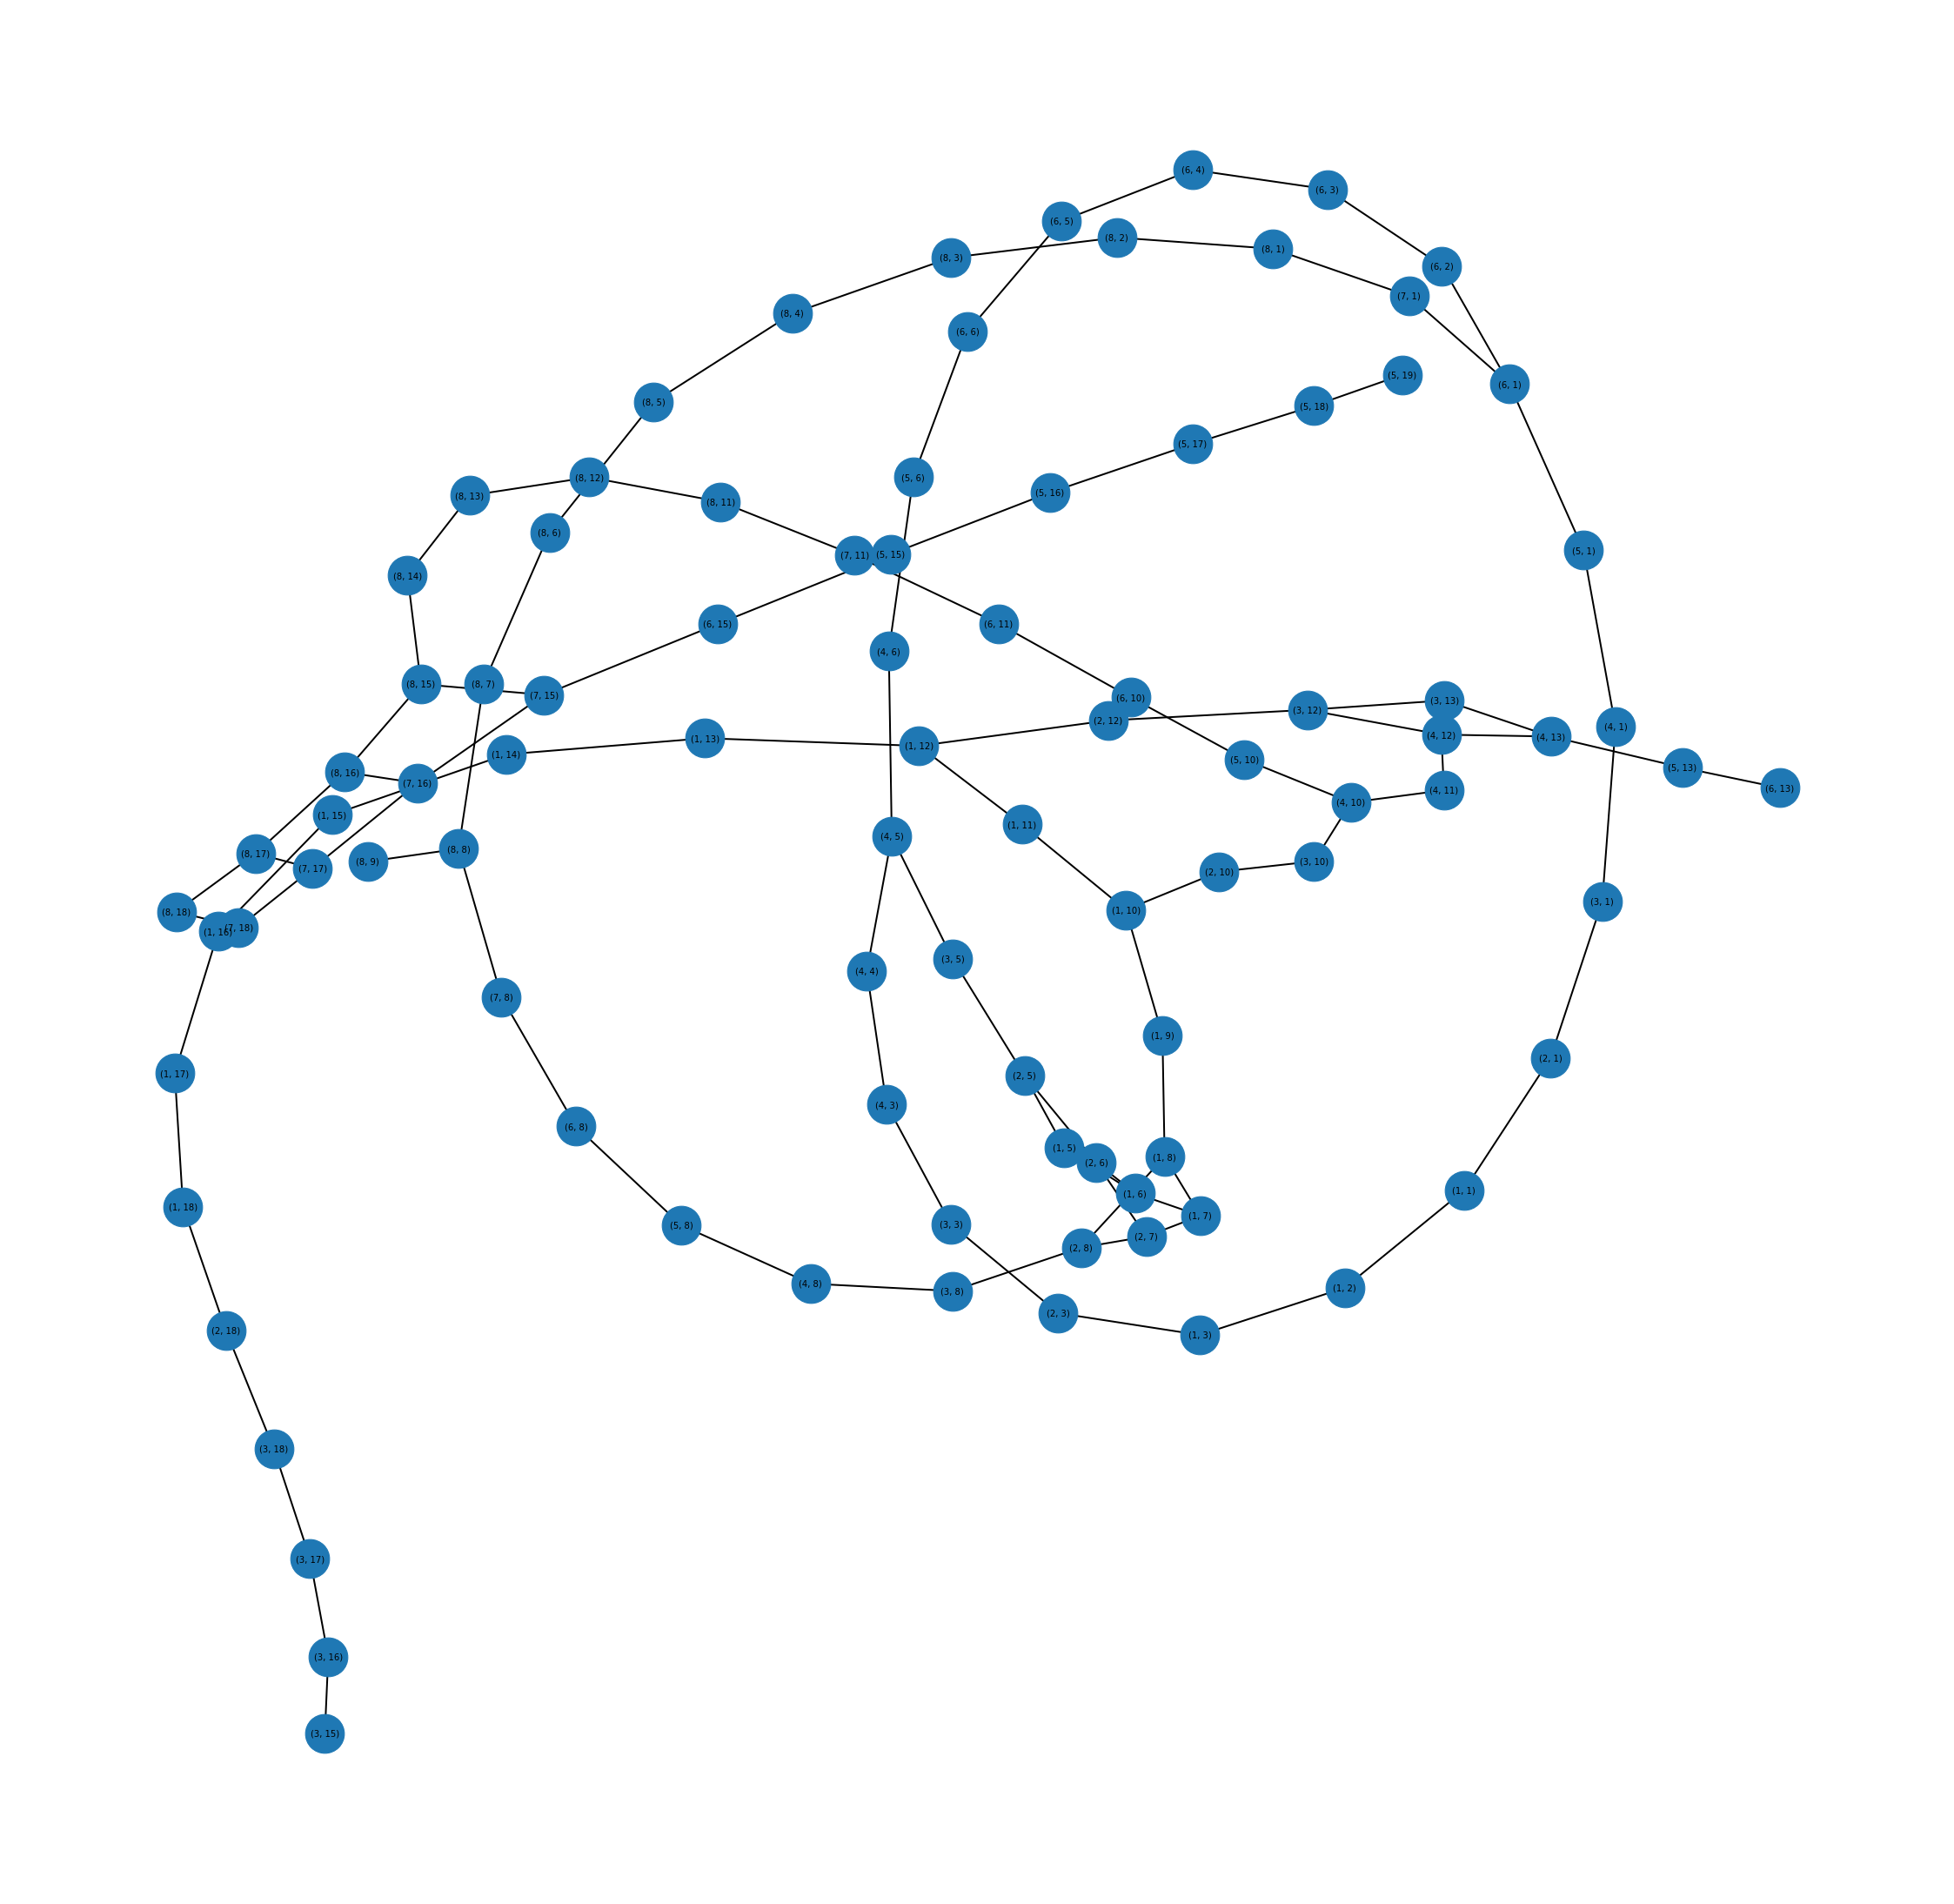

In [12]:
# Show the graph using helper functions
# The layout may change every time you run this cell
# However, the graph (nodes, edges) remains the same

showBinaryMazeGraph(mazegraph)

---
## Path Finding on the Graph

Now that we have the *traversal graph* corresponding to the maze, we may try out various path-finding search algorithms on the graph.

In [13]:
# Helper functions to work with the Maze with Path

def showBinaryMazePath(mazeGrid, mazePath):
    ''' Display the maze corresponding to a binary grid
        Display path(s) superimposed on the binary grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinates of the paths on the maze
        Output : Heatmap grid of the maze with the path
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    for node in mazePath:
        mazeGrid[node[0], node[1]] = 128     # half level of grayscale (0 to 255) to highlight the path
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)

### Breadth-First-Search (BFS)

**Uninformed Search** : Focusses on the graph structure and not the *cost from start* or *distance from goal*.

In [14]:
# Breadth-First-Search (BFS) with FIFO Queue

def breadth_first_search(mazeGraph, start, goal):
    ''' Function to perform BFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.Queue()    # FIFO Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in mazeGraph.neighbors(currentNode):
           
            # ignore if it has already been explored
            if nextNode not in explored:
                
                # put new node in frontier
                frontier.put(nextNode)
                
                # assign current node as parent
                explored[nextNode] = currentNode
    
    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Breadth-First-Search (BFS)

Total nodes in maze : 92
Total nodes visited : 92  |  100.0 %
Final path distance : 35

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


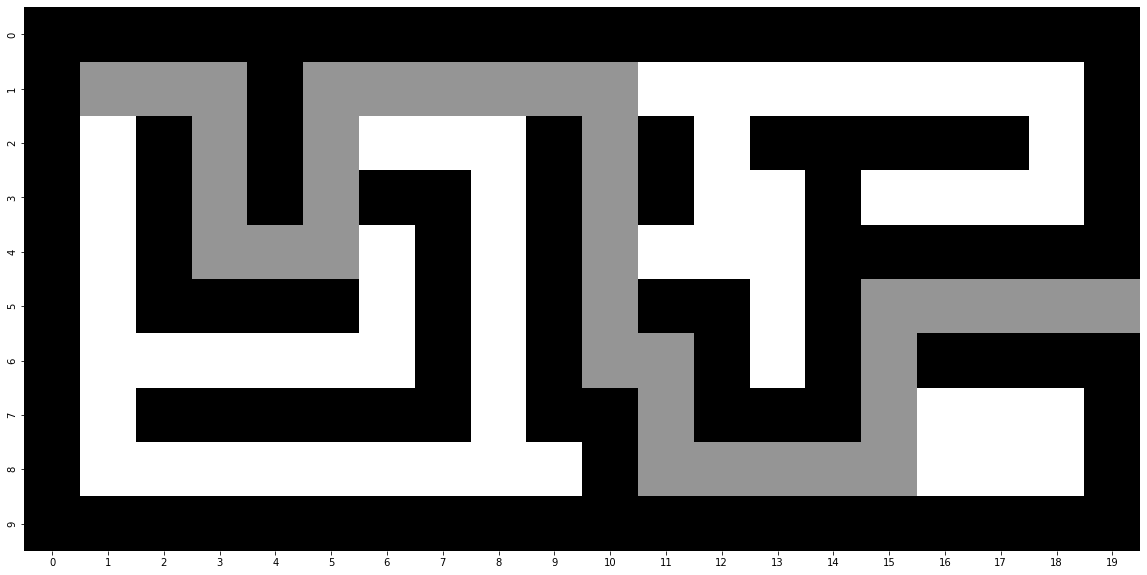

In [15]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the BFS algorithm for path finding
nodesExplored, nodesProcessed = breadth_first_search(mazegraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Breadth-First-Search (BFS)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

Yes, it is complete but not optimal beacause it stops whenever a solution is found.

### Depth-First-Search (DFS)

**Uninformed Search** : Focusses on the graph structure and not the *cost from start* or *distance from goal*.

In [16]:
# This cell has MISSING pieces of code -- fill those in!

# Depth-First-Search (DFS) with _??_ Queue

def depth_first_search(mazeGraph, start, goal):
    ''' Function to perform DFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.LifoQueue()      # Lifo Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # Write the entire logic for this search algorithm
        # Hint : Take note from the BFS algorithm presented above
        currentNode = frontier.get()
        processed += 1
        
        if currentNode == goal:
            break
        for nextNode, weight in mazeGraph.neighbors(currentNode):
            if nextNode not in explored:
                frontier.put(nextNode)
                explored[nextNode] = currentNode
    
    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Depth-First-Search (DFS)

Total nodes in maze : 92
Total nodes visited : 85  |  92.39 %
Final path distance : 57

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (2, 8), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 12), (3, 12), (4, 12), (4, 11), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


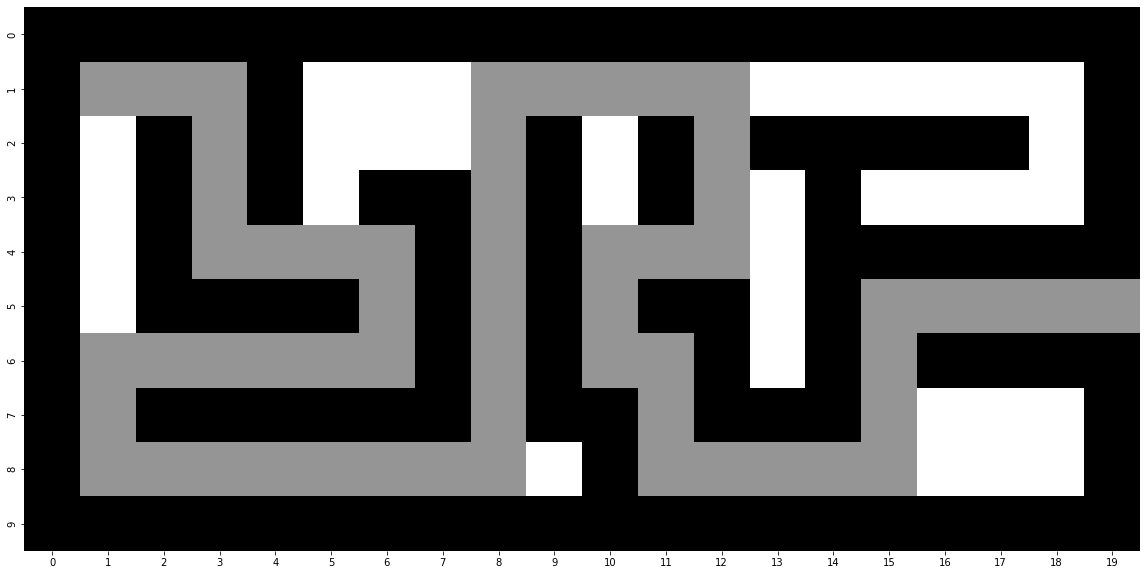

In [17]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the DFS algorithm for path finding
nodesExplored, nodesProcessed = depth_first_search(mazegraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Depth-First-Search (DFS)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

Yes, it is complete but no optimal. Use recursion may increase its efficiency.

### Uniform-Cost-Search (UCS)

**Uninformed Search** : Focusses on the graph structure and the *cost from start*, but not the *distance from goal*.

In [18]:
# Uniform-Cost-Search (UCS) with Priority Queue

def uniform_cost_search(mazeGraph, start, goal):
    ''' Function to perform UCS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in mazeGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            newcost = pathcost[currentNode] + weight

            # consider if not yet explored or if the new cost is lower 
            if (nextNode not in explored) or (newcost < pathcost[nextNode]):

                # set priority as newcost 
                priority = newcost
                
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                # assign current node as parent
                explored[nextNode] = currentNode
                
                # keep track of the updated path cost
                pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Uniform-Cost-Search (UCS)

Total nodes in maze : 92
Total nodes visited : 92  |  100.0 %
Final path distance : 35

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


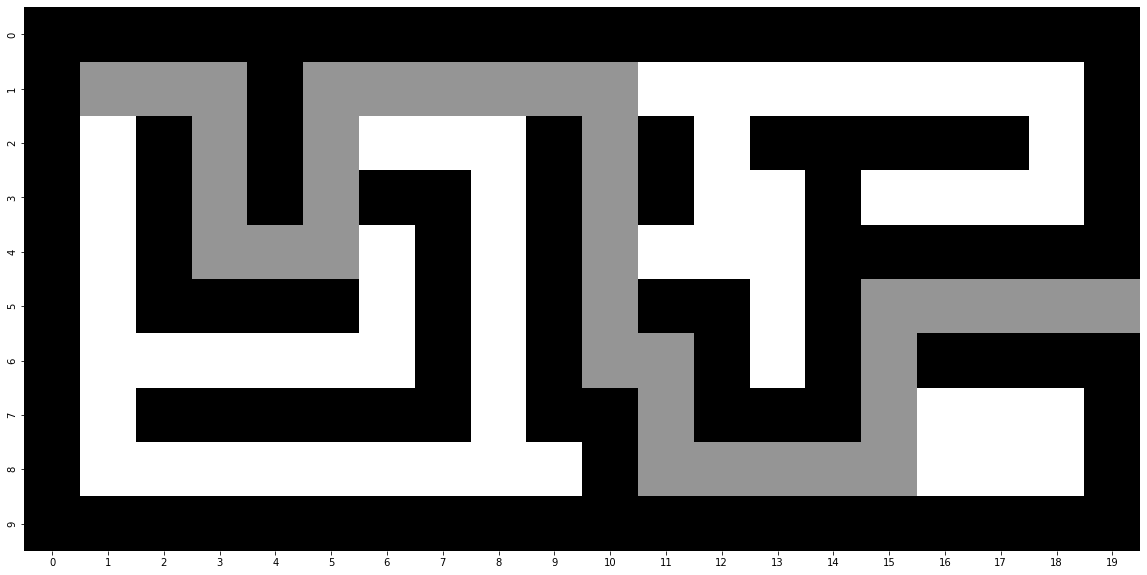

In [19]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the UCS algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = uniform_cost_search(mazegraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Uniform-Cost-Search (UCS)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

Yes, this algorithm is both complete and optimal.

### Greedy-Search (GS)

**Informed Search** : Focusses on the graph structure and the *distance from goal*, but not the *cost from start*.

In [24]:
# This cell has MISSING pieces of code -- fill those in!

# Heuristic function for Distance

def heuristic(nodeA, nodeB):
    (xA, yA) = nodeA
    (xB, yB) = nodeB
    return abs(xA - xB) + abs(yA - yB)


# Greedy-Search (GS) with _??_ Queue

def greedy_search(mazeGraph, start, goal):
    ''' Function to perform GS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()     # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # Write the entire logic for this search algorithm
        # Hint : Take note from the UCS algorithm presented above
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break

        for nextNode, weight in mazeGraph.neighbors(currentNode):
            
            newcost = heuristic(nextNode, goal)

            if (nextNode not in explored) or (newcost < pathcost[nextNode]):

                priority = newcost
                frontier.put((priority, nextNode))
                explored[nextNode] = currentNode
                pathcost[nextNode] = newcost
        
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Greedy-Search (GS)

Total nodes in maze : 92
Total nodes visited : 67  |  72.83 %
Final path distance : 39

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 6), (2, 7), (2, 8), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 12), (3, 12), (4, 12), (4, 11), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


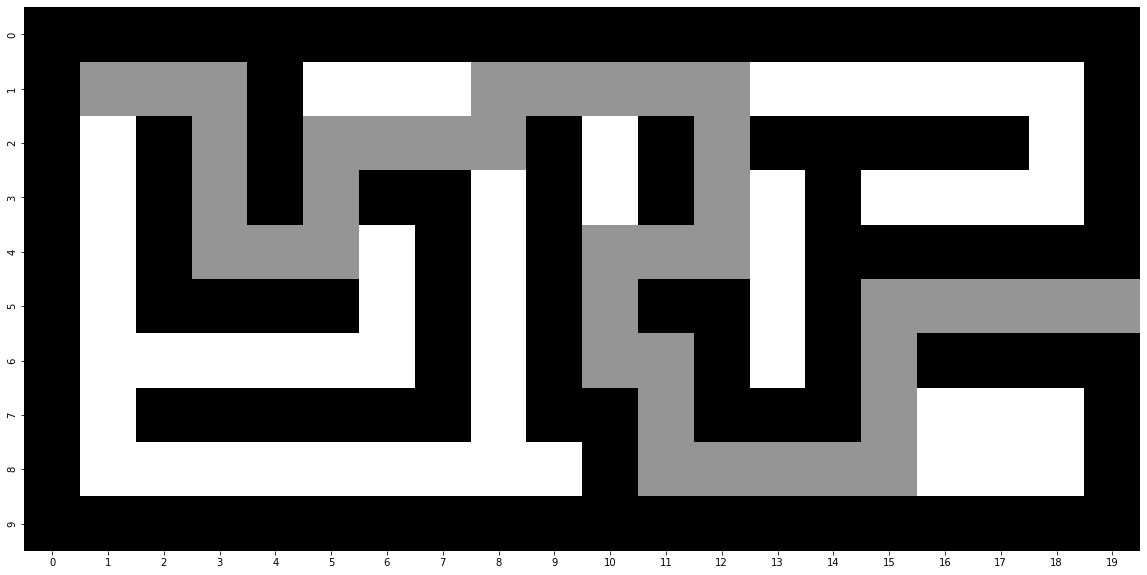

In [25]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the GS algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = greedy_search(mazegraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Greedy-Search (GS)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

The algorithm is not complete nor optimal.

### A\*-Search (A\*S)

**Informed Search** : Focusses on the graph structure, the *cost from start* and also the *distance from goal*.

In [29]:
# This cell has MISSING pieces of code -- fill those in!

# Heuristic function for Distance

def heuristic(nodeA, nodeB):
    (xA, yA) = nodeA
    (xB, yB) = nodeB
    return abs(xA - xB) + abs(yA - yB)


# A*-Search (A*S) with Priority Queue

def astar_search(mazeGraph, start, goal):
    ''' Function to perform A*S to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # Write the entire logic for this search algorithm
        # Hint : Take note from the UCS algorithm presented above
        currentNode = frontier.get()[1]
        processed += 1
        
        if currentNode == goal:
            break

 
        for nextNode, weight in mazeGraph.neighbors(currentNode):

            newcost = pathcost[currentNode] + weight
            
            if (nextNode not in explored) or (newcost < pathcost[nextNode]):
                
                priority = newcost + heuristic(nextNode, goal)
                frontier.put((priority, nextNode))
                explored[nextNode] = currentNode
                pathcost[nextNode] = newcost
                
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

A*-Search (A*S)

Total nodes in maze : 92
Total nodes visited : 92  |  100.0 %
Final path distance : 35

Path through the Maze : [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 6), (2, 7), (2, 8), (1, 8), (1, 9), (1, 10), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (6, 11), (7, 11), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (7, 15), (6, 15), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19)]


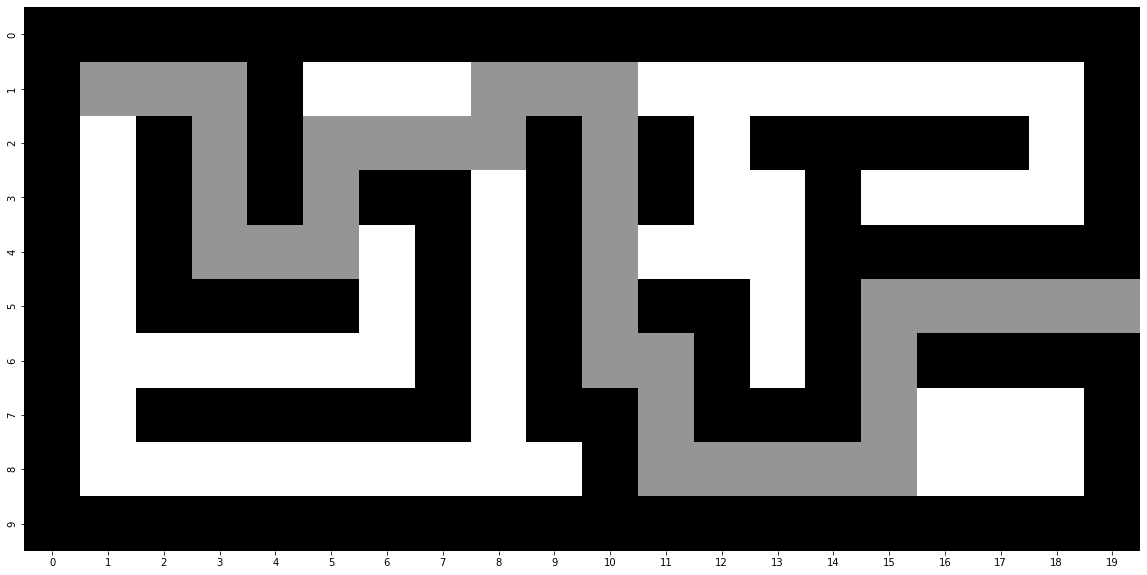

In [30]:
# Define start and goal positions
START = (1,1)
GOAL = (5,19)

# Run the A*S algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = astar_search(mazegraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("A*-Search (A*S)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", path)
showBinaryMazePath(maze,path)

**Think about it!**

Is this algorithm *complete*? Is it *optimal*? What can you do to increase its *efficiency*?

This algorithm is both complete and optimal.

---
## Experiment and Explore (optional)

Play around with the algorithms and their variations at this amazing website : https://qiao.github.io/PathFinding.js/visual/

Let us consider the *efficiency* of an algorithm as the %-age of nodes it has to explore to find the path. Lower the better.

1. Try to redefine the maze (change the initial binary matrix) so that BFS and DFS find the same path. Which one is more efficient?       
2. Try to redefine the maze (change the initial binary matrix) so that UCS and BFS find the same path, but UCS is more efficient than BFS.         
3. Try to redefine the maze (change the initial binary matrix) so that UCS and GS find the same path. Which one is more efficient?       
4. Try to redefine the maze (change the initial binary matrix) so that GS and A\*S find the same path. Which one is more efficient?       
5. Try to redefine the heuristic (Manhattan, Euclidean or Chebyshev distance) in case of GS and A\*S. What changes do you see?       